# 1 - Testes de Hipótese com Python

É uma metodologia estatística que nos auxilia a tomar decisões sobre uma ou mais populações baseado na informação obtida da amostra.

Nos permite verificar se os dados amostrais trazem evidência que apoiem ou não uma hipótese estatística formulada.

Ao tentarmos tomar decisões, é conveniente a formulação de suposições ou de conjeturas sobre as populações de interesse, que, em geral, consistem em considerações sobre parâmetros (μ,σ2,p) das mesmas.

Essas suposições, que podem ser ou não verdadeiras, são denominadas de Hipóteses Estatísticas.

Em muitas situações práticas o interesse do pesquisador é verificar a veracidade sobre um ou mais parâmetros populacionais (μ,σ2,p) ou sobre a distribuição de uma variável aleatória.

In [1]:
import pandas as pd

In [27]:
import numpy as np

In [2]:
df = pd.read_csv('/home/joeldspy/Modelos/datasets/dataset.csv')

In [3]:
df.head()

,estado,sexo,idade,cor,anos_de_estudo,renda,altura
0,SP,Masculino,23,Parda,11 anos,800,160.380762
1,SP,Feminino,23,Branca,11 anos,1150,173.978983
2,SP,Feminino,35,Parda,14 anos,880,176.044382
3,SP,Masculino,46,Branca,5 anos,3500,178.315794
4,SP,Feminino,47,Parda,8 anos,150,169.063095


## 1.1 - Teste de Normalidade

Em estatística, os testes de normalidade são usados para determinar se um conjunto de dados de uma dada variável aleatória, é bem modelada por uma distribuição normal ou não, ou para calcular a probabilidade da variável aleatória subjacente estar normalmente distribuída.

Mais precisamente, os testes são uma forma de selecção de modelos, e podem ser interpretados de várias maneiras, dependendo de como cada um interpreta as probabilidades:

In [4]:
# Importando a função para cálculo do teste de normalidade
from scipy.stats import normaltest

<AxesSubplot: >

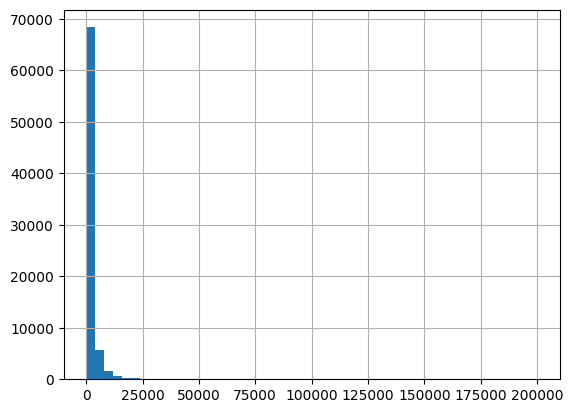

In [11]:
# Visualizando a distribuição da variável renda
df.renda.hist(bins=50)

In [18]:
# Realizando o teste estatístico
statistic, pvalue = normaltest(df.renda)

# Visualizando os resultados
print(statistic)
print(pvalue)

152380.75803960307
0.0


In [19]:
# Rejeitar H0, se o pvalue < 0.05
pvalue < 0.05

True

<AxesSubplot: >

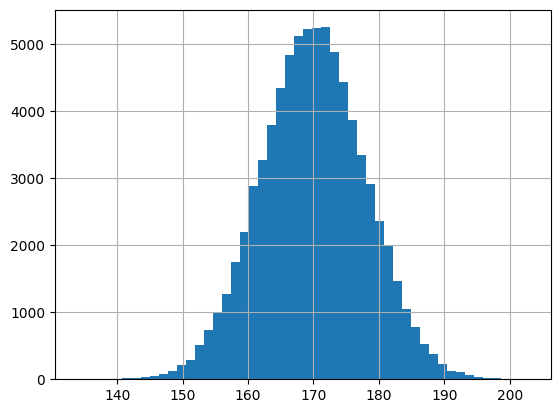

In [23]:
# Visualizando a distribuição da variável altura
df.altura.hist(bins=50)

In [20]:
# Realizando o teste estatístico
statistic, pvalue = normaltest(df.altura)

# Visualizando os resultados
print(statistic)
print(pvalue)

0.19973093956867624
0.9049591541973593


In [21]:
# Rejeitar H0, se o pvalue < 0.05
pvalue < 0.05

False

## 1.2 Passos de um Teste de Hipótese

In [24]:
# Formulação das Hipóteses
H0 = 'Hipótese nula' # Representa a igualdade do teste
H1 = 'Hipótese alternativa' # Representa a diferença do teste

<img src='https://imgur.com/ORgqWvu.png' width=80%>

<img src='https://imgur.com/UfA7c56.png' width=80%>

## 1.3 - Testes Parâmetricos

A empresa Suco Bom produz sucos de frutas em embalagens de 500 ml.

Seu processo de produção é quase todo automatizado e as embalagens de suco são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os órgãos fiscalizadores.

Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção. O setor de controle de qualidade da empresa Suco Bom extrai, periodicamente, amostras de 50 embalagens para monitorar o processo de produção. Para cada amostra, é realizado um teste de hipóteses para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um nível de significância de 5%.

Suponha agora que uma amostra de 50 embalagens foi selecionada e que a média amostral observada foi de 503,24 ml. Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?

In [38]:
H0 = 'A média populacional é de 500ml'
H1 = 'A média populacional não é de 500ml' # Teste Bicaudal

In [26]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [40]:
media_da_amostra = np.mean(amostra); media_da_amostra

503.24

In [39]:
desvio_padrao_da_amostra = np.std(amostra); desvio_padrao_da_amostra

4.438738559545944

In [47]:
from scipy.stats import norm

media_populacional = 500
significancia = 0.05
confiancia = 1 - significancia
n = 50
z_alpha_2 = norm.ppf(0.975)

In [48]:
H0

'A média populacional é de 500ml'

In [49]:
H1

'A média populacional não é de 500ml'

In [50]:
z = (media_da_amostra - media_populacional) / (desvio_padrao_da_amostra / np.sqrt(n))

In [51]:
z

5.1614348092598155

In [55]:
# Rejeitar H0 se z <= -z_alpha_2
z <= -z_alpha_2

False

In [56]:
# Rejeitar H0 se z >= z_alpha_2
z >= z_alpha_2

True